# Logistic Regression

## Binary classification to logistic regression
- The **normal distribution**, also known as the **Gaussian distribution** or **bell curve**, is a function that describes the probability that an observation will have a value between any two real numbers.
-  The **Bernoulli distribution** describes the probability distribution of a random variable that can take the positive case with probability P or the negative case with probability 1-P
<img src="images\Logistic equation.jpg" width ="200"></img>
<img src="images\logistic function.jpg" width ="400"></img>
* For logistic regression, t is equal to a linear combination of explanatory variables, as follows:
<img src="images\Logistic equation2.jpg" width ="200"></img>
* The **logit function** is the inverse of the logistic function. It links F x( ) back to a linear
combination of the explanatory variables:
<img src="images\Logistic equation3.jpg" width ="200"></img>

## Spam filtering

In [7]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

df = pd.read_csv("datasets/SMSSpamCollection", delimiter='\t', header=None)
print("Number of spam messages", df[df[0] == 'spam'][0].value_counts())
print("NUmber of ham messages", df[df[0] == 'ham'][0].value_counts())

#Split the dataset
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[1], df[0])

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

#Initalize Logistic Regression model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print()
for i, predict in enumerate(predictions[:5]):
    print("Prediction:%s || message:%s "%(predict, X_test_raw.iloc[i]))

Number of spam messages spam    747
Name: 0, dtype: int64
NUmber of ham messages ham    4825
Name: 0, dtype: int64

Prediction:ham || message:Dont you have message offer 
Prediction:spam || message:3 FREE TAROT TEXTS! Find out about your love life now! TRY 3 FOR FREE! Text CHANCE to 85555 16 only! After 3 Free, Msgs £1.50 each 
Prediction:ham || message:Did u see what I posted on your Facebook? 
Prediction:ham || message:Of cos can lar i'm not so ba dao ok... 1 pm lor... Y u never ask where we go ah... I said u would ask on fri but he said u will ask today... 
Prediction:ham || message:Home so we can always chat 


## Binary classification performace metrics
- We are only interested in whether the predicted class was correct.
- The most common metrics are **accuracy, precision, recall, F1 measure**, and **ROC AUC score.** All of these measures depend on the concepts of **true positives, true negatives**, **false positives**, and **false negatives**. Positive and negative refer to the classes. True and false denote whether the predicted class is the same as the true class.

### confusion matrix, or contingency table

* A true positive prediction is when the classifier correctly predicts that a message is spam.
* A true negative prediction is when the classifier correctly predicts that a message is ham.
* A prediction that a ham message is spam is a false positive prediction.
* A spam message incorrectly classified as ham is a false negative prediction.

[[4 1]
 [2 3]]


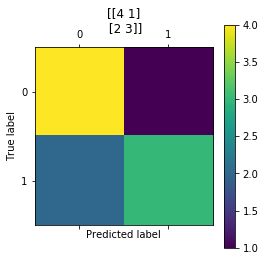

In [3]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_test = [0,0,0,0,0,1,1,1,1,1]
y_pred = [0,1,0,0,0,0,0,1,1,1]

confusion_matrix = confusion_matrix(y_test ,y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title(confusion_matrix)
plt.colorbar()
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

### Accuracy
- Accuracy measures a fraction of the classifier's predictions that are correct.

In [4]:
from sklearn.metrics import accuracy_score
y_pred, y_true = [0,1,1,0], [1,1,1,1]
print("Accuracy score :",accuracy_score(y_true, y_pred))

Accuracy score : 0.5


**Calculate the accuracy to the above codes -> spam filtering**

In [5]:
scores = cross_val_score(classifier, X_train, y_train, cv = 5)
print(np.mean(scores), scores)

0.9564513079104948 [0.94856459 0.94976077 0.95574163 0.96172249 0.96646707]


### Precision and recall
<span style="color:red">There`s some code error in the book!</span>.
- **Precision** is the fraction of messages classified as spam that are actually spam, Sometimes called sensitivity.
<img src="images\precision formula.jpg" width ="100"></img>
- **Recall** is the fraction of spam messages that were truly classified as spam.
<img src="images\recall.jpg" width ="100"></img>

**Calculate precision and recall in spam filtering**

In [15]:
# percision = cross_val_score(classifier,X_train, X_test, cv=5, scoring='precision')
# By sklearn
# from sklearn.metrics import precision_score, recall_score
# np.mean(precision_score(predictions,y_test))
# np.mean(recall_score(predictions,y_test))

### f1_score
<span style="color:red">There`s some code error in the book!</span>.
- The F1 measure is the harmonic mean, or weighted average, of the precision and recall scores.
<img src="images\f1_score.jpg" width ="100"></img>
- F1 measure's penalty is small.

### ROC AUC
<span style="color:red">There`s some code error in the book!</span>.
<img src="images\ROC Curve.jpg" width ="100"></img>

In [12]:
y_test = pd.get_dummies(y_test, drop_first=True)

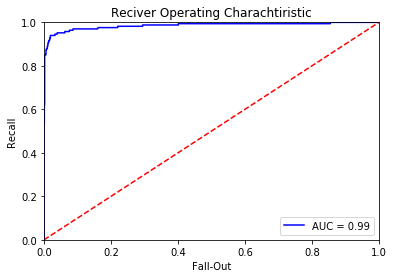

In [13]:
from sklearn.metrics import roc_curve, auc

predictions = classifier.predict_proba(X_test)
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions[:,1])
roc_auc = auc(false_positive_rate, recall)
plt.title("Reciver Operating Charachtiristic")
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f'%roc_auc )
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel("Recall")
plt.xlabel("Fall-Out")
plt.show()

## Tuning models with grid search

**LogisticRegression( Hyperparameters )**
-  Grid search is a common method to select the hyperparameter values that produce the best model.
- **embarrassingly parallel!**

Let's use scikit-learn's GridSearchCV() function to find better
hyperparameter values:

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score

pipeline = Pipeline([('vect', TfidfVectorizer(stop_words='english')), ("clf",LogisticRegression() ) ])
parameters = {
    "vect__max_df":(0.25,0.5,0.75),
    "vect__stop_words":('english',None),
    "vect__max_features":(2500,5000,10000,None),
    "vect__ngram_range":((1,1),(1,2)),
    "vect__use_idf":(True, False),
    "vect__norm":("l1","l2"),
    "clf__penalty":("l1","l2"),
    "clf__C":(0.01,0.1,1,10)}



if __name__ == "__main__":
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy', cv= 3)
    df = pd.read_csv("datasets/SMSSpamCollection", delimiter='\t', header=None)
    X, y = df[1], df[0]
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    grid_search.fit(X_train, y_train)
    print("Best score %0.3f"%grid_search.best_score_ )
    print("Best parameter set :")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r"%(param_name, best_parameters[param_name]))
    predictions = grid_search.predict(X_test)
    print("Accuracy :", accuracy_score(y_test, predictions))
    print("-----------------------------------------------")
    print("Precision with pos_lable spam:", precision_score(y_test, predictions, pos_label = "spam"))
    print("Precision with pos_lable ham:", precision_score(y_test, predictions, pos_label = "ham"))
    print("-----------------------------------------------")
    print("Recall with pos_lable spam:", recall_score(y_test, predictions, pos_label = "spam"))
    print("Recall with pos_lable ham:", recall_score(y_test, predictions, pos_label = "ham"))

D:\Istalled-Program\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1536 candidates, totalling 4608 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 4608 out of 4608 | elapsed:  6.9min finished


Best score 0.982
Best parameter set :
	clf__C: 10
	clf__penalty: 'l2'
	vect__max_df: 0.5
	vect__max_features: 5000
	vect__ngram_range: (1, 2)
	vect__norm: 'l2'
	vect__stop_words: None
	vect__use_idf: True
Accuracy : 0.9899497487437185
-----------------------------------------------
Precision with pos_lable spam: 0.9943502824858758
Precision with pos_lable ham: 0.9893092105263158
-----------------------------------------------
Recall with pos_lable spam: 0.9312169312169312
Recall with pos_lable ham: 0.9991694352159468


## Multi-Class Classification
- scikit-learn uses a strategy called **one-vs.-all**, or **one-vs.-the-rest**, to support multi-class classification.

In [3]:
import pandas as pd
df = pd.read_csv("datasets\SMSSpamCollection.csv"  , header=0, delimiter = "\t")
print(df.count())

ham                                                                                                                5571
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...    5571
dtype: int64


# This dataset required accepting the competetion on a Kaggle
# STOPED Temporary